In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\garv\OneDrive\Desktop\UNITY\Machine Learning\Datasets\diabetes.csv")


In [3]:
# Separate Features and Target
X = df.drop(columns=['Outcome'])  # Features
Y = df['Outcome']                 # Target (0 = No Diabetes, 1 = Diabetes)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Feature Scaling (Standardization) (X - mean(X)) / std(X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {round(accuracy, 4) * 100}%")

Model Accuracy: 75.32%


In [8]:
# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



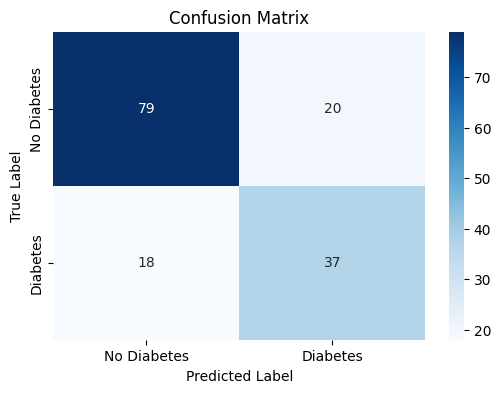

In [9]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

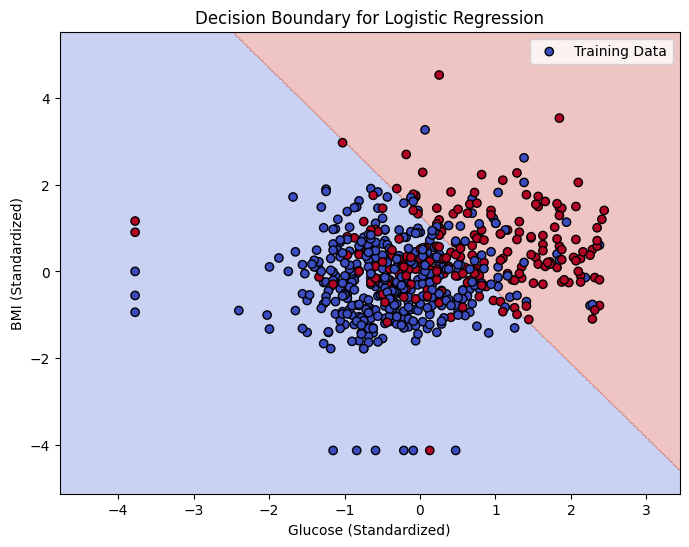

In [10]:
# Decision Boundary Plot (Using Two Features)
X_train_subset = X_train[:, [1, 5]]  # Using 'Glucose' and 'BMI' for 2D plot
X_test_subset = X_test[:, [1, 5]]

# Train Again with Only Two Features
model_2d = LogisticRegression()
model_2d.fit(X_train_subset, Y_train)

# Create Meshgrid for Decision Boundary
x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on Meshgrid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")  # Decision boundary
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=Y_train, cmap="coolwarm", edgecolors='k', label="Training Data")
plt.xlabel("Glucose (Standardized)")
plt.ylabel("BMI (Standardized)")
plt.title("Decision Boundary for Logistic Regression")
plt.legend()
plt.show()